In [1]:
from fuzzywuzzy import process, fuzz
import pickle
import enchant
import difflib
from textblob import TextBlob
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
d = enchant.Dict("en_UK")
from difflib import SequenceMatcher
from fuzzywuzzy import fuzz
import os

In [2]:
#Loading the dump file - OCR Predictions
lineList = [line.rstrip('\n') for line in open('/home/varshini/Downloads/dump (2).txt')]

#Cleaning the dump file 
lineList = list(filter(lambda a: a != '', lineList))
del lineList[::2]       
len(lineList)

#IAM Corpus
infile = open('IAM_final.pkl','rb')
IAM_sentences = pickle.load(infile)
infile.close()

infile1 = open('dump_final.pkl','rb')
lineList = pickle.load(infile1)
infile1.close()

infile2 = open('/home/varshini/Capstone/spellcheck.pkl','rb')
linelistnew = pickle.load(infile2)
infile2.close()

In [ ]:
IAM_sentences[44]

In [ ]:
lineList[44]

In [ ]:
linelistnew[44]

In [ ]:
IAM_sentences[30]

In [ ]:
lineList[30]

In [ ]:
linelistnew[30]

### Text Input to OCR (Blurred Handwritten Image) 

In [ ]:
IAM_sentences[307]

### OCR Prediction

In [ ]:
lineList[307]

### Spellcheck corrections

In [ ]:
linelistnew[307]

In [ ]:
#corpus = '/home/varshini/Capstone/HTR/data/corpus.txt'
#with open(corpus, 'r') as file:
#    data = file.read().replace('\n', '')

#blob = TextBlob(data)
#nouns = blob.noun_phrases

In [ ]:
#infile = open('IAM.pkl','rb')
#IAM_sentences = pickle.load(infile)
#spell = open('/home/varshini/Capstone/corrected_lines.pkl','rb')
#clean = pickle.load(spell)

### Spellcheck

In [ ]:
import spellchecker

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(lineList[263].split())

for word in misspelled:
    # Get the one `most likely` answer
    print("Incorrect Word -->", word)
    print("Correction     -->", spell.correction(word))
    # Get a list of `likely` options
    print("Suggestions", spell.candidates(word))

In [ ]:
IAM_sentences[0]

In [ ]:
lineList[0]

In [ ]:
misspelled

### Cosine Similarity 

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def cosine_similarity(X_list,Y_list):
    # tokenization 
    X_list = word_tokenize(X_list) 
    Y_list = word_tokenize(Y_list) 

    # sw contains the list of stopwords 
    stop_words = stopwords.words('english')
    l1 =[];l2 =[] 

    # remove stop words from string 
    X_set = {w for w in X_list if not w in stop_words} 
    Y_set = {w for w in Y_list if not w in stop_words} 

    # form a set containing keywords of both strings 
    rvector = X_set.union(Y_set) 
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula 
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    #print("similarity: ", cosine) 
    return cosine

### Word Mover Distance

In [ ]:
def calc_wmdistance(a,b,model):
    from gensim.models import Word2Vec, word2vec
    import os
    a = a.lower().split()
    b = b.lower().split()
    stop_words = stopwords.words('english')
    a = [w for w in a if w not in stop_words]
    b = [w for w in b if w not in stop_words]
    distance = model.wmdistance(a,b)
    return distance

import gensim
if not os.path.exists('/home/varshini/Downloads/GoogleNews-vectors-negative300.bin.gz'):
    raise ValueError("Download Google News Model")
model = gensim.models.KeyedVectors.load_word2vec_format('/home/varshini/Downloads/GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

### Cosine Similarity and Word Movers Distance for Predicted Sentences

In [ ]:
dump = lineList
IAM = IAM_sentences
avg_wmd =[]
cos_sim = []
for i in range(len(dump)):
    #print(dump[i],"\n\n",IAM[i],"\n##########\n")
    dumpl = dump[i].lower()
    iaml = IAM[i].lower()
    wmd = calc_wmdistance(iaml,dumpl,model)
    cos = cosine_similarity(iaml,dumpl)
    cos_sim.append(cos)   
    avg_wmd.append(wmd) 

In [ ]:
avg_wmd_clean =[]
cos_sim_clean = []
IAM = IAM_sentences
for i in range(len(linelistnew)):
    #print(dump[i],"\n\n",IAM[i],"\n##########\n")
    dumpl = linelistnew[i].lower()
    iaml = IAM[i].lower()
    wmd = calc_wmdistance(iaml,dumpl,model)
    cos = cosine_similarity(iaml,dumpl)
    cos_sim_clean.append(cos)   
    avg_wmd_clean.append(wmd)    

### Fuzzy Token Set Sort

In [3]:
dump = lineList
IAM = IAM_sentences
edit_distances =[]
fpr = []
ftsort = []
ftset = []
for i in range(len(dump)-1):
    #print(dump[i],"\n\n",IAM[i],"\n##########\n")
    dumpl = dump[i].lower()
    iaml = IAM[i].lower()
    match = SequenceMatcher(None,dumpl, iaml)
    edit_dist = match.ratio()
    edit_distances.append(edit_dist) 
    
    token_sort_ratio = fuzz.token_sort_ratio(dumpl, iaml)
    ftsort.append(token_sort_ratio)
    
    token_set_ratio = fuzz.token_set_ratio(dumpl, iaml)
    ftset.append(token_set_ratio)

In [4]:
edit_distances_clean =[]
ftsort_clean  = []
ftset_clean  = []
for i in range(len(linelistnew)-1):
    #print(dump[i],"\n\n",IAM[i],"\n##########\n")
    dumpl = linelistnew[i].lower()
    iaml = IAM[i].lower()
    match = SequenceMatcher(None,dumpl, iaml)
    edit_dist = match.ratio()
    edit_distances_clean .append(edit_dist) 
    
    token_sort_ratio = fuzz.token_sort_ratio(dumpl, iaml)
    ftsort_clean .append(token_sort_ratio)
    
    token_set_ratio = fuzz.token_set_ratio(dumpl, iaml)
    ftset_clean .append(token_set_ratio)

In [5]:
#import pickle
#with open('/home/varshini/Capstone/spellcheck.pkl', 'rb') as f:
    #linelistnew = pickle.load(f)

### Accuracies of OCR Predicted Sentences- Similarity Measure

In [6]:
from statistics import mean
print("Average Fuzzy Token set ratio of OCR Prediction ",mean(ftset))
print("Average Fuzzy Token set ratio after Spellcheck  ",mean(ftset_clean))


Average Fuzzy Token set ratio of OCR Prediction  77.1403118040089
Average Fuzzy Token set ratio after Spellcheck   80.13363028953229


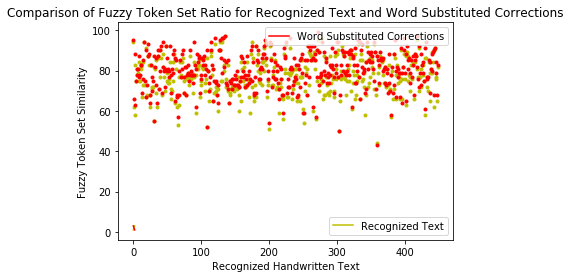

In [7]:
line1, = plt.plot([1, 2, 3], label="Recognized Text", linestyle='-', color = 'y')
line2, = plt.plot([3, 2, 1], label="Word Substituted Corrections", linestyle='-', color = 'r')

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='lower right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='upper right')
plt.plot((ftset), 'y.', (ftset_clean), 'r.')
plt.title('Comparison of Fuzzy Token Set Ratio for Recognized Text and Word Substituted Corrections')
plt.ylabel('Fuzzy Token Set Similarity')
plt.xlabel('Recognized Handwritten Text')
plt.show()

In [8]:
gcp_file = open('/home/varshini/Capstone/gcp.pickle','rb')
gcp1 = pickle.load(gcp_file)
gcp_file.close()

In [9]:
gcp = [ v for v in gcp1.values() ]

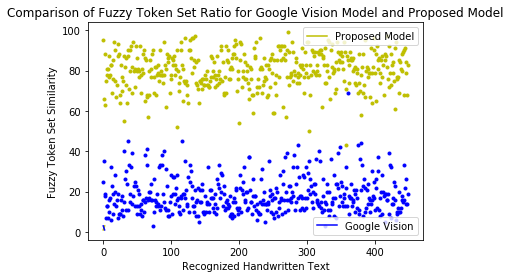

In [10]:
line1, = plt.plot([1, 2, 3], label="Proposed Model", linestyle='-', color = 'y')
line2, = plt.plot([3, 2, 1], label="Google Vision", linestyle='-', color = 'b')

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='upper right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='lower right')

plt.plot((gcp), 'b.',(ftset_clean), 'y.')
plt.title('Comparison of Fuzzy Token Set Ratio for Google Vision Model and Proposed Model')
plt.ylabel('Fuzzy Token Set Similarity')
plt.xlabel('Recognized Handwritten Text')
plt.show()

In [11]:
print("Average Fuzzy Token set ratio Google Vision  ",mean(gcp))

Average Fuzzy Token set ratio Google Vision   18.51224944320713


In [ ]:
with open('IAM_final.pkl', 'wb') as f:
    pickle.dump(IAM, f)
with open('dump_final.pkl', 'wb') as f:
    pickle.dump(dump, f)

In [ ]:
import language_check
tool = language_check.LanguageTool('en-UK')
text = u'A sentence with a error in the Hitchhiker’s Guide tot he Galaxy'
matches = tool.check(text)